# Fetal Health Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Get data

In [2]:
df = pd.read_csv('files/fetal_health.csv')
df.info() # 2126 patients, 21 features and a target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [3]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [6]:
df.describe().T # no missing data, all numeric, different scales 

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

## Some EDA 

### General sense of variables

<AxesSubplot:>

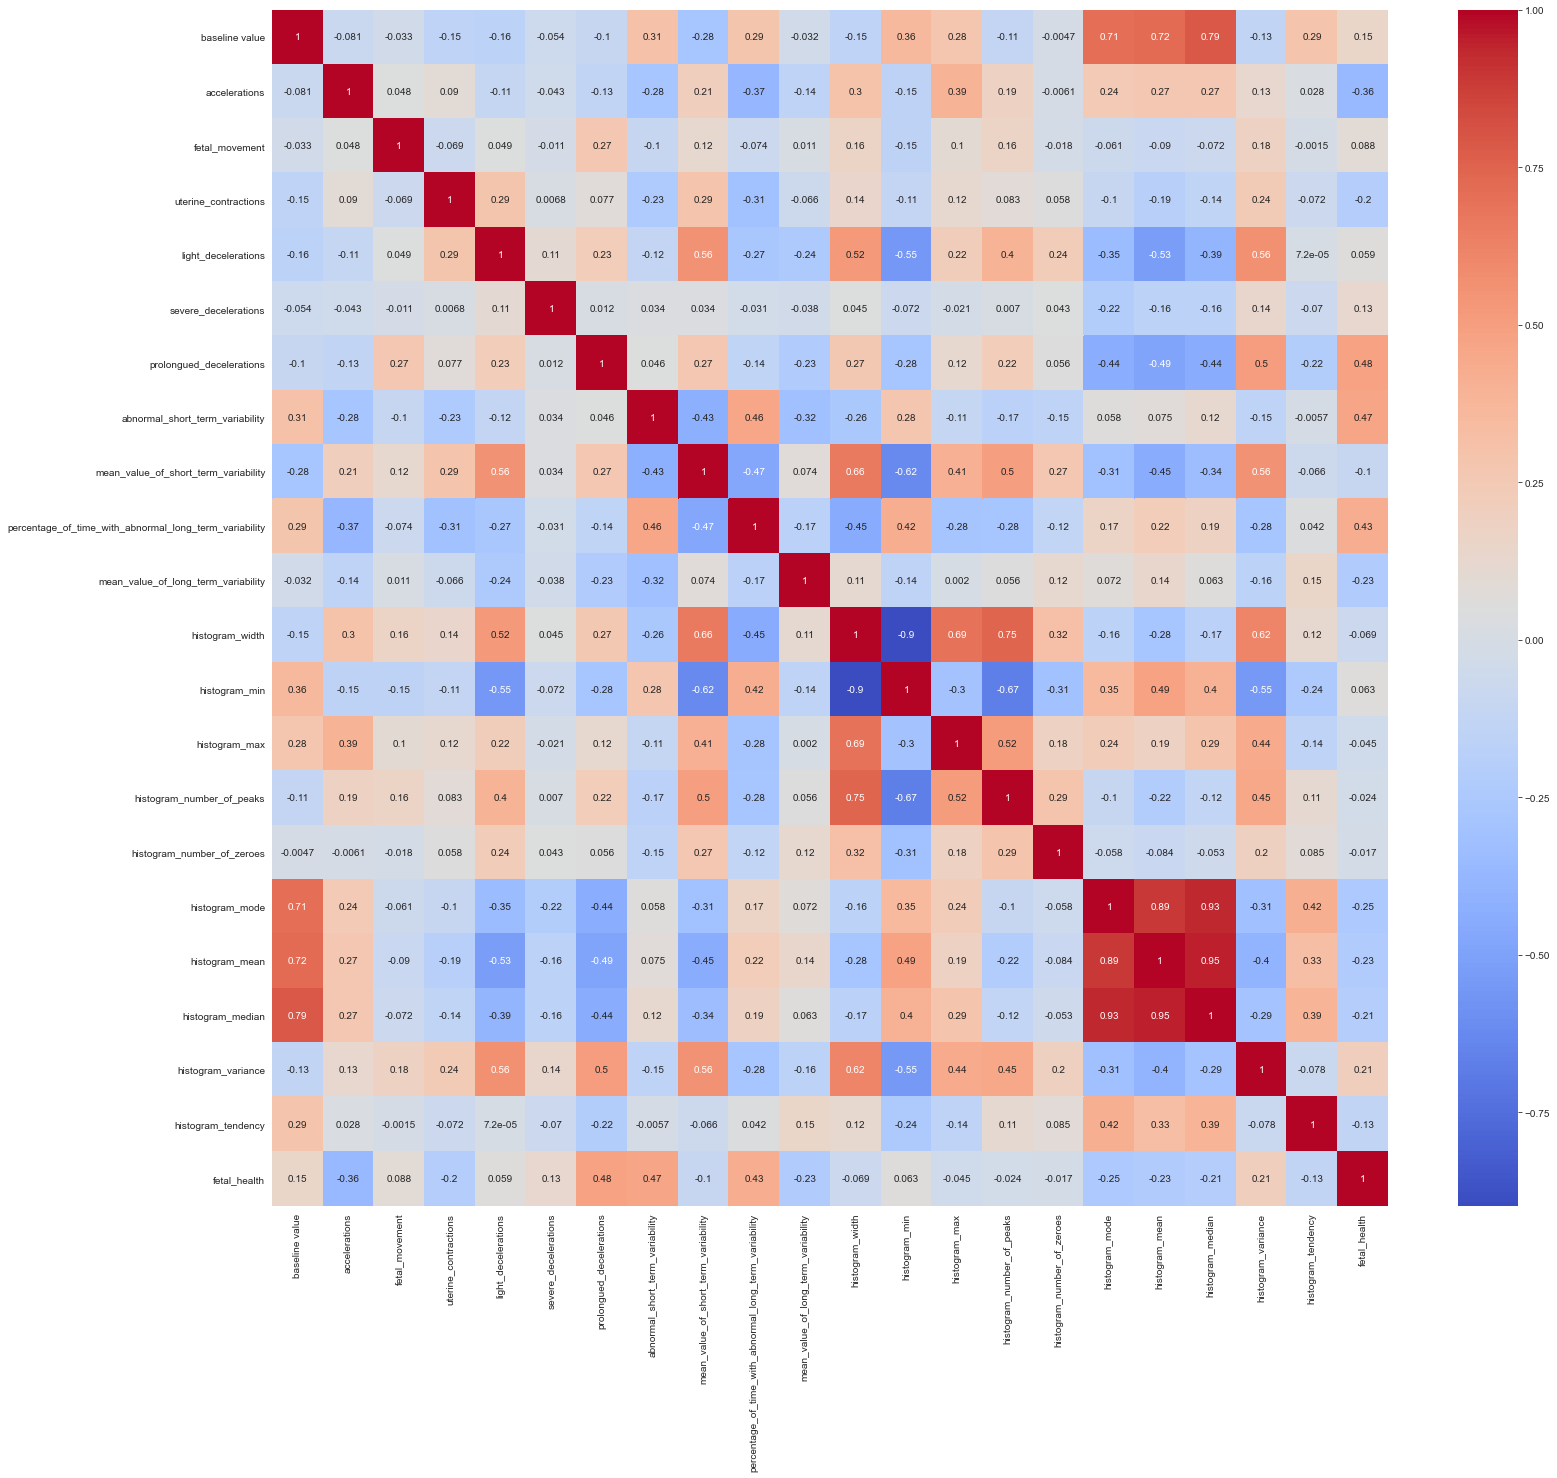

In [10]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [46]:
sns.pairplot(df)

### Fetal Health

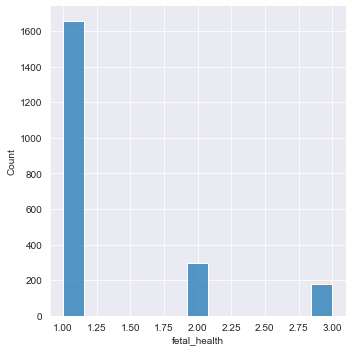

In [22]:
# About 1650 normal, 300 suspect, 180 pathological
sns.displot(x='fetal_health',data=df)

### Acceleration/Deceleration on Fetal Health

<AxesSubplot:xlabel='accelerations', ylabel='Count'>

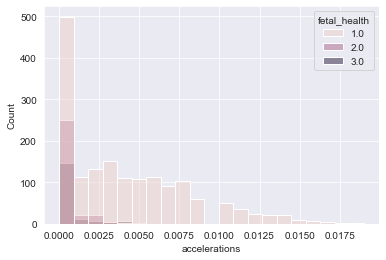

In [45]:
# Higher acceleration --> better fetal health 
sns.histplot(x='accelerations', hue ='fetal_health', data=df)

<AxesSubplot:xlabel='prolongued_decelerations', ylabel='Count'>

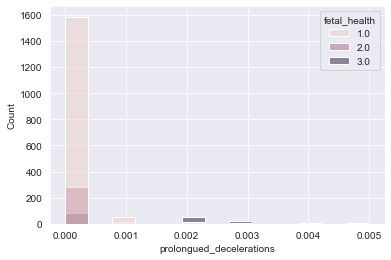

In [44]:
# Higher prolongued deceleration --> worse fetal health
sns.histplot(x='prolongued_decelerations', hue ='fetal_health', data=df)

### Variability on fetal health 

Overall: More variability is worse for fetal health.

#### short term variability

<AxesSubplot:xlabel='abnormal_short_term_variability', ylabel='Count'>

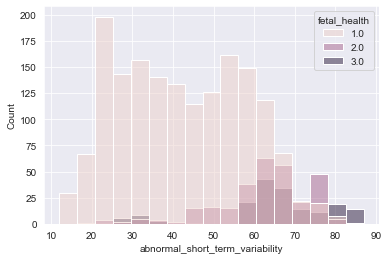

In [43]:
# Higher short term variability --> worse fetal health
sns.histplot(x='abnormal_short_term_variability', hue ='fetal_health', data=df)

#### long term variability

<AxesSubplot:xlabel='percentage_of_time_with_abnormal_long_term_variability', ylabel='Count'>

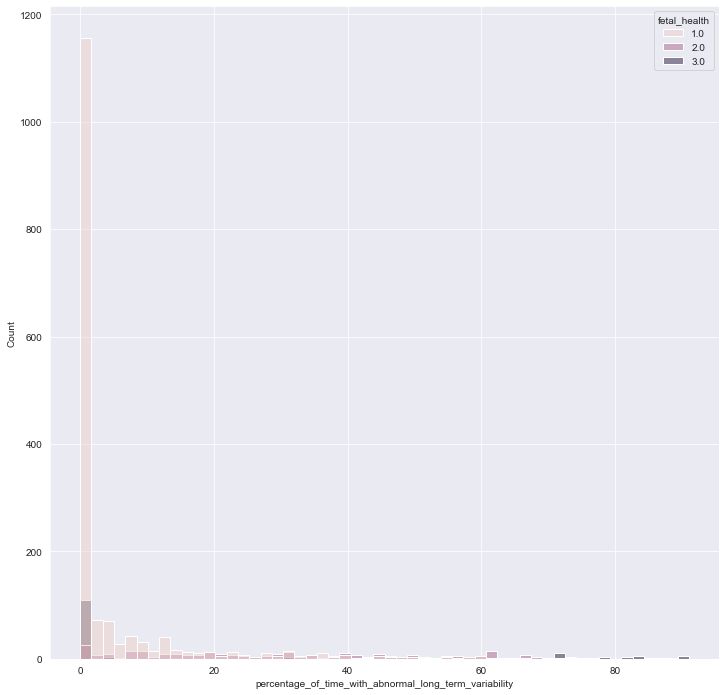

In [50]:
# higher long term variability --> worse fetal health 
plt.figure(figsize=(12,12))
sns.histplot(x='percentage_of_time_with_abnormal_long_term_variability', hue ='fetal_health', data=df)

#### Histogram variance

<AxesSubplot:xlabel='histogram_variance', ylabel='Count'>

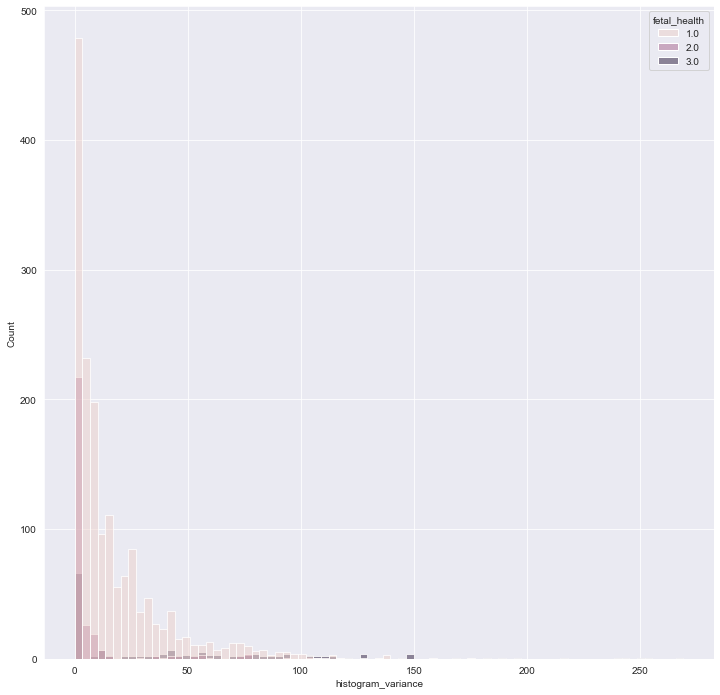

In [53]:
# 0 or high histogram variances --> worse fetal health 
plt.figure(figsize=(12,12))
sns.histplot(x='histogram_variance', hue ='fetal_health', data=df)

### Standard levels

Overall: Higher standard levels is worse for fetal health. 

#### Baseline value

<AxesSubplot:xlabel='baseline value', ylabel='Count'>

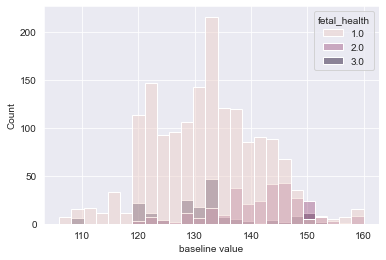

In [58]:
# Fairly normal, suspect when higher baseline value 
sns.histplot(x='baseline value', hue ='fetal_health', data=df)

#### Histogram mean

<AxesSubplot:xlabel='histogram_mean', ylabel='Count'>

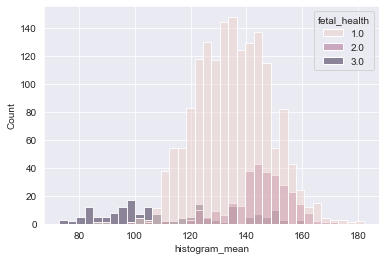

In [56]:
# Low or high histogram mean --> worse fetal health 
sns.histplot(x='histogram_mean', hue ='fetal_health', data=df)

#### Histogram median

<AxesSubplot:xlabel='histogram_median', ylabel='Count'>

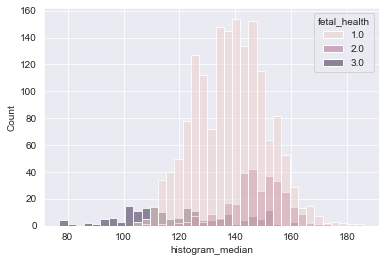

In [59]:
# Low or high histogram median --> worse fetal health 
sns.histplot(x='histogram_median', hue ='fetal_health', data=df)

### Uterine Contractions

<AxesSubplot:xlabel='uterine_contractions', ylabel='Count'>

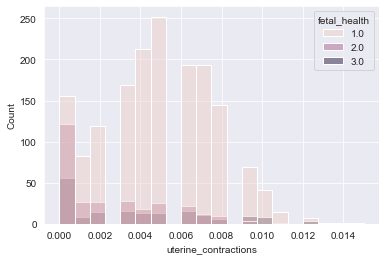

In [62]:
# Low uterine contractions --> worse fetal health 
sns.histplot(x='uterine_contractions', hue ='fetal_health', data=df)

### General trends:
* Accelerations are correlated with better fetal health and decelerations are correltaed with worse fetal health
* More stable closer to average is better for fetal health whereas higher variability is worse for fetal health. 
* Uterine contractions are correlated with better fetal health. 

## Data Prep

### Scale Data

In [63]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [64]:
X = scale.fit_transform(df.drop('fetal_health',axis=1))

In [65]:
y = df['fetal_health']

### Split data into train and test

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Modelling

### Logistic Regression 

#### Build and train model

In [69]:
from sklearn.linear_model import LogisticRegression

In [115]:
lrc = LogisticRegression(max_iter=2000)

In [116]:
lrc.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

#### Make predictions on test data

In [117]:
pred = lrc.predict(X_test)

#### Evaluate model performance

In [118]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

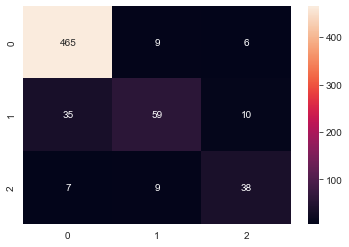

In [119]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

In [120]:
# 88% accuracy overall
# 70% f1 for pathological
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.92      0.97      0.94       480
         2.0       0.77      0.57      0.65       104
         3.0       0.70      0.70      0.70        54

    accuracy                           0.88       638
   macro avg       0.80      0.75      0.77       638
weighted avg       0.87      0.88      0.87       638



### KNN

#### Build and train model

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knnc = KNeighborsClassifier()

In [79]:
knnc.fit(X_train,y_train)

KNeighborsClassifier()

#### Make predictions on test data

In [80]:
pred = knnc.predict(X_test)

#### Evaluate model performance

<AxesSubplot:>

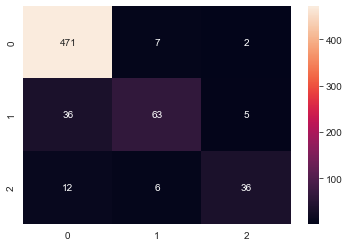

In [81]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

In [82]:
# 89% accuracy overall
# 74% f1 for pathological
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.91      0.98      0.94       480
         2.0       0.83      0.61      0.70       104
         3.0       0.84      0.67      0.74        54

    accuracy                           0.89       638
   macro avg       0.86      0.75      0.80       638
weighted avg       0.89      0.89      0.89       638



#### Choose a better K with elbow method

In [83]:
error_rates = []
for k in range(1,50):
    knnc = KNeighborsClassifier(n_neighbors=k)
    knnc.fit(X_train,y_train)
    pred = knnc.predict(X_test)
    err = np.mean(y_test != pred)
    error_rates.append(err)

In [86]:
import plotly.express as px
px.line(df,x=range(1,50), y=error_rates, title='Error Rate vs. K value', labels={'x':'K','y':'Error Rate'})

#### Try with K=1

              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       480
         2.0       0.78      0.67      0.72       104
         3.0       0.82      0.87      0.85        54

    accuracy                           0.91       638
   macro avg       0.85      0.83      0.84       638
weighted avg       0.90      0.91      0.90       638



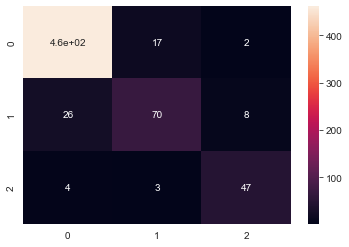

In [87]:
knnc = KNeighborsClassifier(n_neighbors=1)
knnc.fit(X_train,y_train)
pred = knnc.predict(X_test)
sns.heatmap(confusion_matrix(y_test,pred),annot=True) # 2% increase in overall acc, pre, rec, f1 stats 
print(classification_report(y_test,pred)) # 91% accuracy overall, 85% F1 on pathological (much better)

### Decision Tree

#### Build and train model

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dtc = DecisionTreeClassifier()

In [90]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

#### Make predictions on test data

In [91]:
pred = dtc.predict(X_test)

#### Evaluate model performance

<AxesSubplot:>

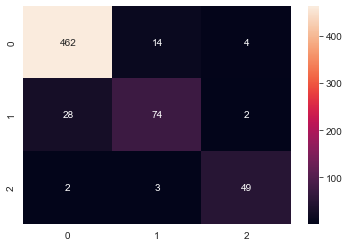

In [94]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

In [93]:
# 92% accuracy overall
# 90% F1 score for pathological 
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       480
         2.0       0.81      0.71      0.76       104
         3.0       0.89      0.91      0.90        54

    accuracy                           0.92       638
   macro avg       0.88      0.86      0.87       638
weighted avg       0.91      0.92      0.92       638



### Random Forest

#### Build and train model

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rfc = RandomForestClassifier()

In [97]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

#### Make predictions on test data

In [98]:
pred = rfc.predict(X_test)

#### Evaluate model performance

<AxesSubplot:>

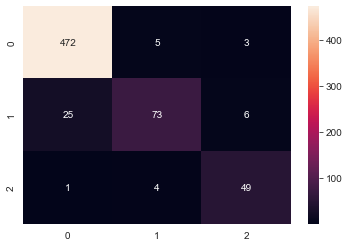

In [99]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

In [100]:
# 93% accuracy overall
# 88% F1 score for pathological 
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       480
         2.0       0.89      0.70      0.78       104
         3.0       0.84      0.91      0.88        54

    accuracy                           0.93       638
   macro avg       0.89      0.86      0.88       638
weighted avg       0.93      0.93      0.93       638



#### Check if performance varies with n_estimators

In [105]:
error_rates = []
for n in range(50,2001,50):
    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train,y_train)
    pred = knnc.predict(X_test)
    err = np.mean(y_test != pred)
    error_rates.append(err)

In [106]:
# no change
import plotly.express as px
px.line(df, x=range(50,2001,50), y=error_rates, title='Error Rate vs. K value', labels={'x':'K','y':'Error Rate'})

### Neural Network

In [107]:
from sklearn.neural_network import MLPClassifier

In [110]:
mlpc = MLPClassifier(max_iter=2000)

In [111]:
mlpc.fit(X_train,y_train)

MLPClassifier(max_iter=2000)

In [112]:
pred = mlpc.predict(X_test)

In [113]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

<AxesSubplot:>

In [114]:
# 92% accuracy overall
# 82% F1 score for pathological 
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       480
         2.0       0.85      0.73      0.79       104
         3.0       0.84      0.80      0.82        54

    accuracy                           0.92       638
   macro avg       0.88      0.83      0.85       638
weighted avg       0.92      0.92      0.92       638



## Winners: Decision Tree & Random Forest!

Note - You can achieve even better performance with hyperparameter tuning. I will learn how to do that soon!